In [7]:
# PYTORCH Feed forward pipeline for MNIST

import torch
import torch.nn as nn
import torchvision # for datasets
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # run on gpu is possible

def load_MNIST(data_path='../data/'):
    """
    Return MNIST train and val dataset
    """
    MNIST_train = datasets.MNIST(
        data_path,       
        train=True,      
        download=False,   
        transform=transforms.Compose([
            transforms.CenterCrop(20),
            transforms.Grayscale(),
            transforms.ToTensor(),
        ]))

    MNIST_test = datasets.MNIST(
        data_path, 
        train=False,      
        download=False,   
        transform=transforms.Compose([
            transforms.CenterCrop(20),
            transforms.Grayscale(),
            transforms.ToTensor(),
        ]))

    print('Size of the training dataset: ', len(MNIST_train))
    print('Size of the validation dataset: ', len(MNIST_test))

    return MNIST_train, MNIST_test

MNIST_train, MNIST_test = load_MNIST()

Size of the training dataset:  60000
Size of the validation dataset:  10000


In [12]:
# Load data
batch_size = 100

train_loader = torch.utils.data.DataLoader(MNIST_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(MNIST_test, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, lables = examples.next()
print(samples.shape)
print(lables.shape)

torch.Size([100, 1, 20, 20])
torch.Size([100])


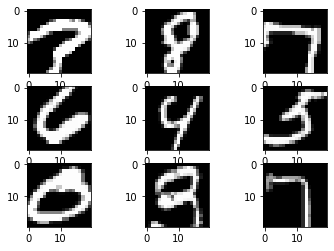

In [13]:
# Inspect images

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [14]:
# Hyperparameters

input_size = 400 # image 20x20
hidden_size = 100 # try arbitrary value given by engineer
num_classes = 10 # integers 0-9
num_epochs = 5
learning_rate = 0.001

In [15]:
# Network

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) # 1st layer
        self.relu = nn.ReLU() # activation function for first layer
        self.l2 = nn.Linear(hidden_size, num_classes) # 2nd (final) layer

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out  # omit softmax for output classification due to cross entropy below

# instantiate model
model = NeuralNet(input_size, hidden_size, num_classes)

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
n_steps = len(train_loader)            # num examples
for epoch in range(num_epochs):
    for i, (images, lables) in enumerate(train_loader):

        images = images.reshape(-1,20*20).to(device)
        lables = lables.to(device)

        # forward
        outputs = model(images)            # 1: predict
        loss = criterion(outputs, lables)  # 2: calculate loss

        # backward
        optimizer.zero_grad()   # 1: empty vals in gradient
        loss.backward()         # 2: backpropagation
        optimizer.step()        # 3: update parameters

        # print info
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_steps}], Loss: {loss.item():.4f}')

# Test and eval accuracy
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, lables in test_loader:
        images = images.reshape(-1,20*20).to(device)
        lables = lables.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += lables.shape[0]
        n_correct = (predictions == lables).sum().item()
    acc = 100.0*n_correct / n_samples
    print(f'Prediction accuracy = {acc}')
    

Epoch [1/5], Step [100/600], Loss: 0.7278
Epoch [1/5], Step [200/600], Loss: 0.3843
Epoch [1/5], Step [300/600], Loss: 0.3270
Epoch [1/5], Step [400/600], Loss: 0.2861
Epoch [1/5], Step [500/600], Loss: 0.1883
Epoch [1/5], Step [600/600], Loss: 0.2842
Epoch [2/5], Step [100/600], Loss: 0.1923
Epoch [2/5], Step [200/600], Loss: 0.1483
Epoch [2/5], Step [300/600], Loss: 0.1251
Epoch [2/5], Step [400/600], Loss: 0.1859
Epoch [2/5], Step [500/600], Loss: 0.1933
Epoch [2/5], Step [600/600], Loss: 0.1402
Epoch [3/5], Step [100/600], Loss: 0.2089
Epoch [3/5], Step [200/600], Loss: 0.1663
Epoch [3/5], Step [300/600], Loss: 0.1180
Epoch [3/5], Step [400/600], Loss: 0.1531
Epoch [3/5], Step [500/600], Loss: 0.1846
Epoch [3/5], Step [600/600], Loss: 0.0919
Epoch [4/5], Step [100/600], Loss: 0.1077
Epoch [4/5], Step [200/600], Loss: 0.0710
Epoch [4/5], Step [300/600], Loss: 0.0977
Epoch [4/5], Step [400/600], Loss: 0.0990
Epoch [4/5], Step [500/600], Loss: 0.1760
Epoch [4/5], Step [600/600], Loss: